import sys

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

//anaconda/envs/m4_janalysis/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import aggregate_mummer_results

In [6]:
full_data = pd.read_csv("percent_identities.tsv" ,sep = '\t')

In [7]:
full_data.head(3)

,Unnamed: 0,mummer file,ref bin,query bin,query name,query contig count,query bin name,ref name,ref contig count,ref bin name,...,query contigs,query file name,ref bp,ref contigs,ref file name,% identity,query alignment length total,number alignments aggregated,frac of query aligned,estimated % identity
0,0,Rhodocyclaceae-49_Ga0081631_to_Methylophilacea...,Ga0081624,Ga0081631,Rhodocyclaceae-49,190,Rhodocyclaceae-49_Ga0081631,Methylophilaceae-40,240,Methylophilaceae-40_Ga0081624,...,189,Rhodocyclaceae-49_Ga0081631.fasta,1297884,239,Methylophilaceae-40_Ga0081624.fasta,86.967273,286,2,0.000077,0.006723
1,0,Methylosarcina_lacus-69_Ga0081643_to_Acidovora...,Ga0081609,Ga0081643,Methylosarcina lacus-69,217,Methylosarcina_lacus-69_Ga0081643,Acidovorax-123,18,Acidovorax-123_Ga0081609,...,216,Methylosarcina_lacus-69_Ga0081643.fasta,2720811,17,Acidovorax-123_Ga0081609.fasta,82.767176,1388,3,0.000339,0.028097
2,0,Methylosarcina_lacus-55_Ga0081634_to_Acidovora...,Ga0081651,Ga0081634,Methylosarcina lacus-55,443,Methylosarcina_lacus-55_Ga0081634,Acidovorax-79,98,Acidovorax-79_Ga0081651,...,442,Methylosarcina_lacus-55_Ga0081634.fasta,2768114,97,Acidovorax-79_Ga0081651.fasta,79.679943,1048,2,0.000563,0.044885


In [8]:
organism_names = full_data['query name'].unique()

In [9]:
organism_names

array(['Rhodocyclaceae-49', 'Methylosarcina lacus-69',
       'Methylosarcina lacus-55', 'Methylotenera mobilis-76-1',
       'Methylobacter-69', 'Methylophilus methylotrophus-127-1',
       'Opititae-40', 'Methylobacte-98r', 'Acidovorax-123',
       'Methylophilaceae-49', 'Acidovorax-75', 'Bacteria-21',
       'Methylotenera mobilis-76-2', 'Acidovora-69x',
       'Methylophilus methylotrophus-129-2', 'Bacteriovora-8x',
       'Flavobacteriaceae-79-2', 'Methylobacter-123',
       'Methylophilus methylotrophus-98', 'Methylophilaceae-40',
       'Methylophilus methylotrophus-55', 'Burkholderiales-55',
       'Methylotenera mobilis-123', 'Burkholderiales-76',
       'Methylophilaceae-8', 'Acidovorax-21',
       'Methylophilus methylotrophus-129-1', 'Acidovorax-98',
       'Methylophilaceae-55', 'Bacteriovorax-49',
       'Methylotenera mobilis-63', 'Methylovulum miyakonense-55',
       'Burkholderiales-129', 'Flavobacteriaceae-49',
       'Methylophilus methylotrophus-79',
       'Methylo

In [10]:
plot_names = [n for n in organism_names if "Methylotenera" in n] + \
             [n for n in organism_names if "Acidovorax" in n]

In [11]:
plot_names

['Methylotenera mobilis-76-1',
 'Methylotenera mobilis-76-2',
 'Methylotenera mobilis-123',
 'Methylotenera mobilis-63',
 'Acidovorax-123',
 'Acidovorax-75',
 'Acidovorax-21',
 'Acidovorax-98',
 'Acidovorax-127',
 'Acidovorax-79']

In [12]:
def only_selected_query_and_ref(name_list):
    all_data = pd.read_csv("percent_identities.tsv" ,sep = '\t')
    all_data = all_data[all_data['query name'].isin(name_list)]
    all_data = all_data[all_data['ref name'].isin(name_list)]
    print("num rows selected: {}".format(all_data.shape[0]))
    return all_data

In [13]:
plot_data = only_selected_query_and_ref(plot_names)

num rows selected: 86


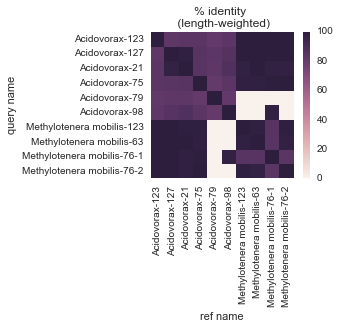

In [14]:
ax = plt.axes()
sns.heatmap(aggregate_mummer_results.pivot_identity_table(plot_data), ax = ax, )
ax.set_title('% identity \n (length-weighted)')
ax.figure.tight_layout()
ax.figure.set_size_inches(w=4, h=6)
ax.figure.savefig('160601_original_percent_identity_measure.pdf')


In [15]:
plot_data.head()

,Unnamed: 0,mummer file,ref bin,query bin,query name,query contig count,query bin name,ref name,ref contig count,ref bin name,...,query contigs,query file name,ref bp,ref contigs,ref file name,% identity,query alignment length total,number alignments aggregated,frac of query aligned,estimated % identity
3,0,Methylotenera_mobilis-76-1_Ga0081647_to_Methyl...,Ga0081640,Ga0081647,Methylotenera mobilis-76-1,208,Methylotenera_mobilis-76-1_Ga0081647,Methylotenera mobilis-63,291,Methylotenera_mobilis-63_Ga0081640,...,207,Methylotenera_mobilis-76-1_Ga0081647.fasta,1642972,290,Methylotenera_mobilis-63_Ga0081640.fasta,84.924765,305230,149,0.125403,10.649837
12,0,Methylotenera_mobilis-76-2_Ga0081649_to_Acidov...,Ga0081613,Ga0081649,Methylotenera mobilis-76-2,409,Methylotenera_mobilis-76-2_Ga0081649,Acidovorax-127,60,Acidovorax-127_Ga0081613,...,408,Methylotenera_mobilis-76-2_Ga0081649.fasta,3161893,59,Acidovorax-127_Ga0081613.fasta,100.000000,159,2,0.000053,0.005304
32,0,Acidovorax-21_Ga0081621_to_Methylotenera_mobil...,Ga0081649,Ga0081621,Acidovorax-21,446,Acidovorax-21_Ga0081621,Methylotenera mobilis-76-2,409,Methylotenera_mobilis-76-2_Ga0081649,...,445,Acidovorax-21_Ga0081621.fasta,2997616,408,Methylotenera_mobilis-76-2_Ga0081649.fasta,97.670000,86,1,0.000047,0.004586
36,0,Acidovorax-98_Ga0081659_to_Acidovorax-123_Ga00...,Ga0081609,Ga0081659,Acidovorax-98,359,Acidovorax-98_Ga0081659,Acidovorax-123,18,Acidovorax-123_Ga0081609,...,358,Acidovorax-98_Ga0081659.fasta,2720811,17,Acidovorax-123_Ga0081609.fasta,83.451002,170025,156,0.050519,4.215872
40,0,Methylotenera_mobilis-123_Ga0081608_to_Methylo...,Ga0081649,Ga0081608,Methylotenera mobilis-123,300,Methylotenera_mobilis-123_Ga0081608,Methylotenera mobilis-76-2,409,Methylotenera_mobilis-76-2_Ga0081649,...,299,Methylotenera_mobilis-123_Ga0081608.fasta,2997616,408,Methylotenera_mobilis-76-2_Ga0081649.fasta,98.991738,1187351,260,0.539381,53.394227


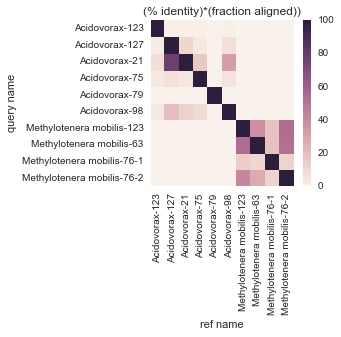

In [16]:
ax = plt.axes()
sns.heatmap(aggregate_mummer_results.pivot_identity_table(plot_data, value_var='estimated % identity'), 
            ax = ax)
ax.set_title('(% identity)*(fraction aligned))')
ax.figure.tight_layout()
ax.figure.set_size_inches(w=4, h=6)
ax.figure.savefig('160601_original_percent_identity_tims_frac_aligned.pdf')


In [17]:
def subset_given_colnames(name_list):
    full_data = pd.read_csv("percent_identities.tsv" ,sep = '\t')
    all_names = full_data['query name'].unique()
    
    # build a list of names to pick out. 
    plot_names = []
    
    for org_name in name_list:
        plot_names += [n for n in organism_names if org_name in n]
    
    # reduce to the desired organisms. 
    selected_data = full_data.copy()
    selected_data = selected_data[selected_data['query name'].isin(plot_names)]
    selected_data = selected_data[selected_data['ref name'].isin(plot_names)]
    
    print("num rows selected: {}".format(selected_data.shape[0]))
    return selected_data

In [18]:
def plot_metrics_as_heatmaps(metric_list, organism_list, figsize=(10, 6)):
    print(len(metric_list))
    fig, axn = plt.subplots(1, len(metric_list), 
                            sharex=True, sharey=True, 
                            figsize=figsize)
    cbar_ax = fig.add_axes([.91, .3, .03, .4])

    data = subset_given_colnames(name_list = organism_list)
    data['% of query aligned'] = data['frac of query aligned']*100
    
    for i, metric in enumerate(metric_list):
        # prepare pivoted data
        print("i: {}, metric: {}".format(i, metric))
        subplot_ax = axn[i]
        print('axis: {}'.format(subplot_ax))
        subplot_data = aggregate_mummer_results.pivot_identity_table(data, 
                                                                     value_var=metric)
        sns.heatmap(subplot_data, ax=axn[i],
                    cbar=i == 0,
                    vmin=0, vmax=100,
                    cbar_ax=None if i else cbar_ax
                   )
        subplot_ax.set_title(metric)

    fig.tight_layout(rect=[0, 0, .9, 1])

3
num rows selected: 86
i: 0, metric: % identity
axis: Axes(0.125,0.125;0.227941x0.775)
i: 1, metric: % of query aligned
axis: Axes(0.398529,0.125;0.227941x0.775)
i: 2, metric: estimated % identity
axis: Axes(0.672059,0.125;0.227941x0.775)


//anaconda/envs/m4_janalysis/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


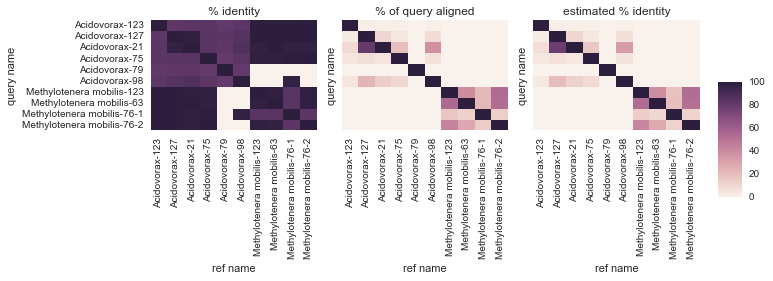

In [19]:
p = plot_metrics_as_heatmaps(['% identity', '% of query aligned', 'estimated % identity'], 
                             ['Methylotenera mobilis', 'Acidovorax'],
                             figsize=(11, 4))